<a href="https://colab.research.google.com/github/Krisnayoga288/Brazilian_e-Commerce_Exploartory_Data_Analysis/blob/main/_05_220_I_GEDE_ANDIKA_KRISNA_YOGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#03_[I GEDE ANDIKA KRISNA YOGA]

#Studi Kasus : Brazilian E-Commerce Public Dataset by Olist
Data ini merupakan kumpulan data publik e-niaga Brasil dari pesanan yang dibuat di Olist Store. Dataset memiliki informasi 100k pesanan dari 2016 hingga 2018 yang dibuat di beberapa pasar di Brasil. Fitur-fiturnya memungkinkan melihat pesanan dari berbagai dimensi: mulai dari status pesanan, harga, kinerja pembayaran dan pengiriman hingga lokasi pelanggan, atribut produk, dan akhirnya ulasan yang ditulis oleh pelanggan. Kami juga merilis kumpulan data geolokasi yang menghubungkan kode pos Brasil dengan koordinat lat/lng.

#Skema Data : 
Data ini dibagi dalam beberapa kumpulan data untuk pemahaman dan organisasi yang lebih baik. Berikut merupakan Skema dari Dataset Brazilian E-Commerce Public Dataset by Olist :

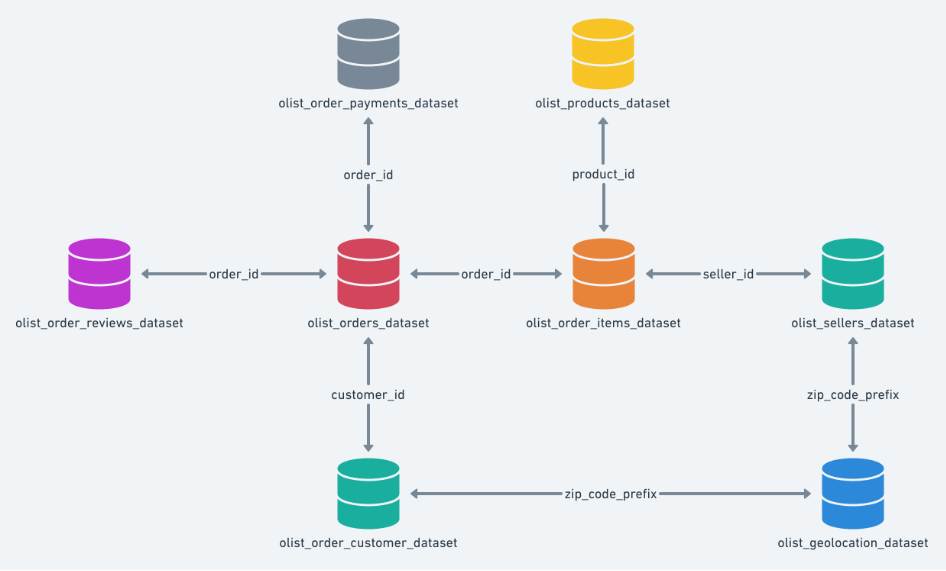

##Import Necessary Libraries


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##Import & Read Data

In [ ]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_product_category_name = pd.read_csv("product_category_name_translation.csv")

##Data Cleaning

###customers

In [ ]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df_customers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
df_customers.describe(include = 'O')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [ ]:
df_customers.duplicated().sum()

0

In [ ]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

###geolocation

In [ ]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
df_geolocation.describe(include = 'O')

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


In [ ]:
df_geolocation.duplicated().sum()

261831

In [ ]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

###Order_items

In [ ]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
df_items.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [ ]:
df_items.duplicated().sum()

0

In [ ]:
df_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

###order_payments

In [ ]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
df_payments.describe(include = 'O')

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [ ]:
df_payments.duplicated().sum()

0

In [ ]:
df_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

###order_reviews

In [ ]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
#Mengubah Tipe data
date = ['review_creation_date','review_answer_timestamp']
for i in date:
  df_reviews[i] = pd.to_datetime(df_reviews[i])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
df_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_reviews.describe(include = 'O')

,review_id,order_id,review_comment_title,review_comment_message
count,99224,99224,11568,40977
unique,98410,98673,4527,36159
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom
freq,3,3,423,230


In [ ]:
df_reviews.duplicated().sum()

0

In [ ]:
df_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

###orders

In [ ]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
#Mengubah Tipe data
date = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for i in date:
  df_orders[i] = pd.to_datetime(df_orders[i])

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
df_orders.describe(include = 'O')

,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
freq,1,1,96478


In [ ]:
df_orders.duplicated().sum()

0

In [ ]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#Menghapus null
dropped_df_orders =df_orders.copy()
dropped_df_orders.dropna(axis=0,inplace=True)
dropped_df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


###products

In [ ]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
df_products.describe(include = 'O')

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


In [ ]:
df_products.duplicated().sum()

0

In [ ]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

###sellers

In [ ]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
df_sellers.describe(include = 'O')

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


In [ ]:
df_sellers.duplicated().sum()

0

In [ ]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

###product_category_name

In [ ]:
df_product_category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
df_product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
df_product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
df_product_category_name.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
df_product_category_name.describe(include = 'O')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
df_product_category_name.duplicated().sum()

0

In [ ]:
df_product_category_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

##Exploratory Data Analysis

In [ ]:
#merging data
data1 = pd.merge(df_customers, df_orders, on='customer_id', how='inner')
data2 = pd.merge(data1, df_items, on='order_id', how='inner')
data3 = pd.merge(data2, df_sellers, on='seller_id', how='inner')
data4 = pd.merge(data3, df_payments, on='order_id', how='inner')
data5 = pd.merge(data4, df_products, on='product_id', how='inner')
data6 = pd.merge(data5, df_reviews, on='order_id', how='inner')
data7 = pd.merge(data6, df_product_category_name, on='product_category_name', how='inner')

In [ ]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  int64         
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

Menambahkan kolom periode waktu menggunakan kolom 'order_purchase_timestamp'

In [ ]:
data7['order_purchase_timestamp'] = pd.to_datetime(data7['order_purchase_timestamp'])
#Tahun
data7['year'] = data7['order_purchase_timestamp'].dt.year
#Bulan
data7['month'] = data7['order_purchase_timestamp'].dt.month
month_name = {0 : 'Januari', 1 : 'Februari', 2 : 'Maret', 3 : 'April', 4 : 'Mei', 5 : 'Juni', 6 : 'Juli', 7 : 'Agustus', 8 : 'September', 9: 'Oktober', 10 : 'Nopember', 11 : 'Desember'}
data7['month_name'] = data7['month'].map(month_name)
#Hari dalam 1 Minggu
data7['day_of_week'] = data7['order_purchase_timestamp'].dt.dayofweek
#Mama hari
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
data7['day_name'] = data7['day_of_week'].map(day_name)

Distribusi customer berdasarkan negara


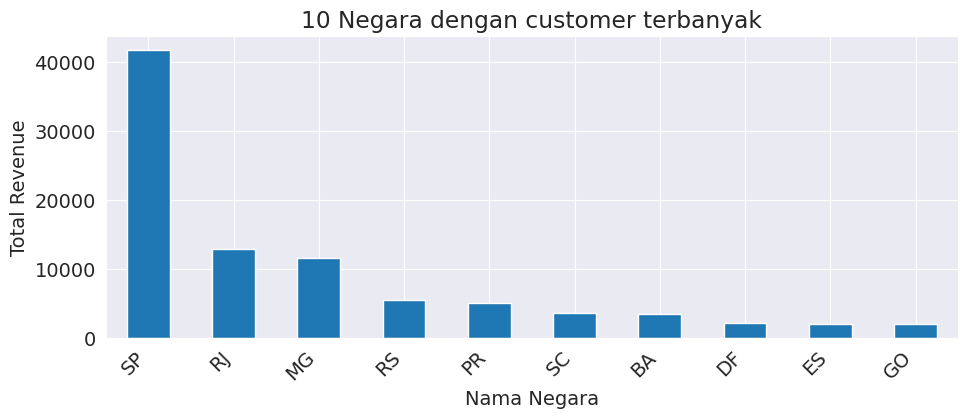

In [ ]:
#customer distribution by state
top_state_by_customer = df_customers.groupby(["customer_state"])["customer_unique_id"].count().sort_values(ascending=False)
top_state_by_customer
#visualisasi
plt.figure(figsize=(11,4), dpi=100)
top_state_by_customer.head(10).plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nama Negara')
plt.ylabel("Total Revenue")
plt.title("10 Negara dengan customer terbanyak")
plt.show()

Distribusi customer berdasarkan kota

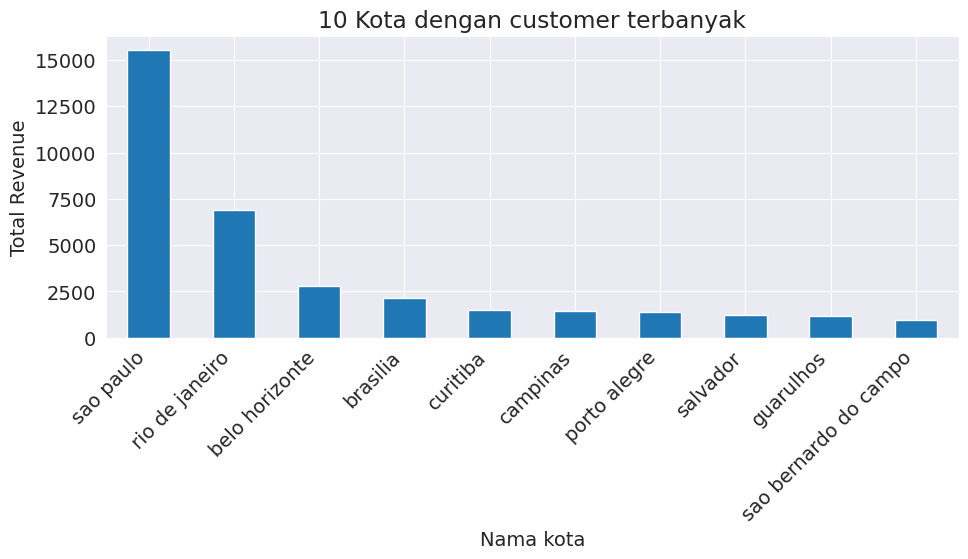

In [ ]:
#customer distribution by city
top_city_by_customer = df_customers.groupby(["customer_city"])["customer_unique_id"].count().sort_values(ascending=False)
top_city_by_customer
#visualisasi
plt.figure(figsize=(11,4), dpi=100)
top_city_by_customer.head(10).plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nama kota')
plt.ylabel("Total Revenue")
plt.title("10 Kota dengan customer terbanyak")
plt.show()

Menampilkan Customer 5 dengan order terbanyak

In [ ]:
customer_per_order = df_customers.groupby(["customer_unique_id"])["customer_id"].count().sort_values(ascending=False).iloc[:5]
customer_per_order

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
Name: customer_id, dtype: int64

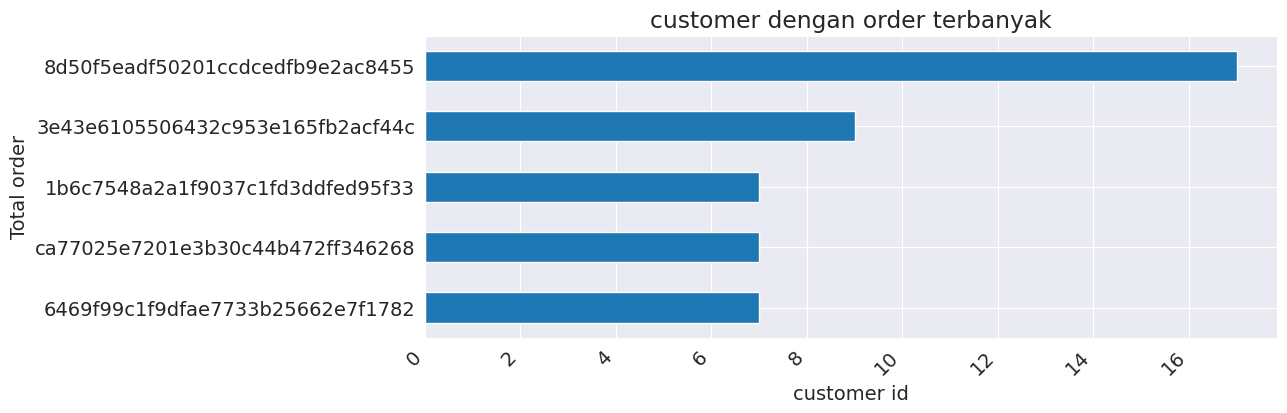

In [ ]:
plt.figure(figsize=(11,4), dpi=100)
customer_per_order.head(5).sort_values(ascending=True).plot(kind="barh")
plt.xticks(rotation=45, ha='right')
plt.xlabel('customer id')
plt.ylabel("Total order")
plt.title("customer dengan order terbanyak")
plt.show()

Menampilkan Perbandingan Metode Pembayaran

In [ ]:
payment_type = data5.groupby(["payment_type"])["order_id"].count().sort_values(ascending=False)
payment_type

payment_type
credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: order_id, dtype: int64

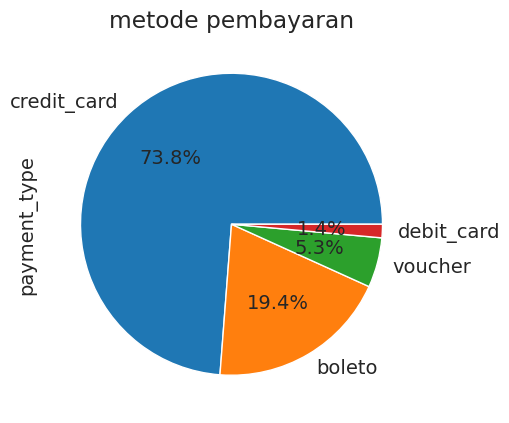

In [ ]:
#visualisasi
plt.figure(figsize=(5,5), dpi= 100)
data5['payment_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("metode pembayaran")
plt.show()

Menghitung score/rating payment

In [ ]:
payment_score = data6.groupby(["payment_type"])["review_score"].count().sort_values(ascending=False)
payment_score


payment_type
credit_card    86520
boleto         22835
voucher         6282
debit_card      1692
Name: review_score, dtype: int64

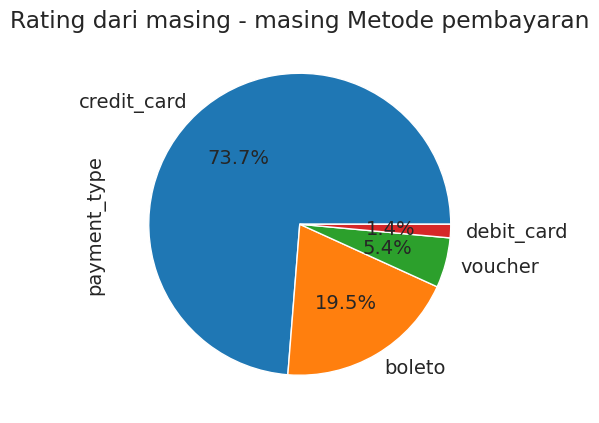

In [ ]:
#visualisasi
plt.figure(figsize=(5,5), dpi= 100)
data6['payment_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Rating dari masing - masing Metode pembayaran")
plt.show()

Menampilkan 5 produk dengan penjualan tertinggi

In [ ]:
product_per_order = data7.groupby(["product_category_name_english"])["order_id"].count().sort_values(ascending=False).iloc[:5]
product_per_order

product_category_name_english
bed_bath_table           11847
health_beauty             9944
sports_leisure            8942
furniture_decor           8743
computers_accessories     8105
Name: order_id, dtype: int64

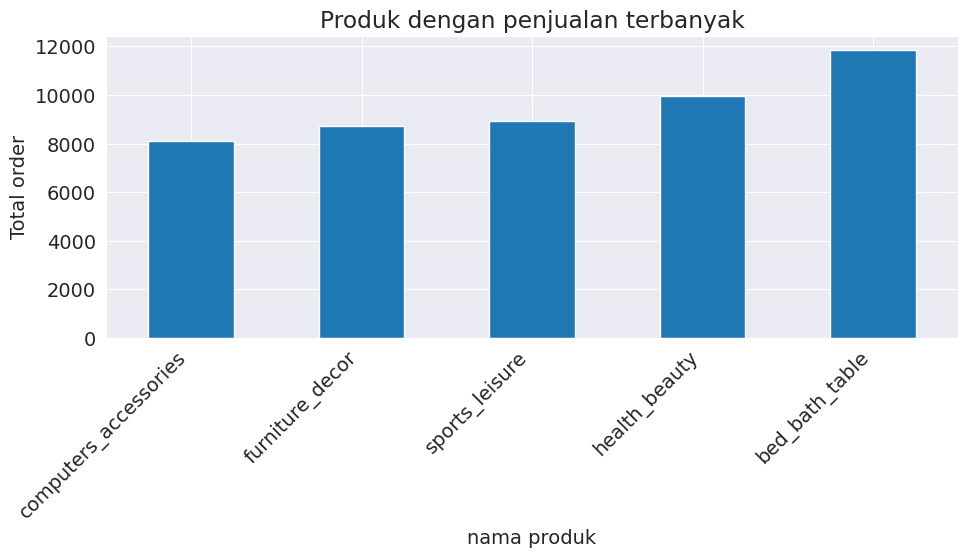

In [ ]:
#visualisasi
plt.figure(figsize=(11,4), dpi=100)
product_per_order.head(5).sort_values(ascending=True).plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.xlabel('nama produk')
plt.ylabel("Total order")
plt.title("Produk dengan penjualan terbanyak")
plt.show()

Menampilkan Produk dengan penjualan tertinggi

In [ ]:
#highest_selling_product
highest_selling_product = data7.groupby(["product_category_name_english"])["price"].sum().sort_values(ascending=False).iloc[:5]
highest_selling_product

product_category_name_english
health_beauty            1290883.52
watches_gifts            1245783.11
bed_bath_table           1095770.05
sports_leisure           1022489.29
computers_accessories     944992.54
Name: price, dtype: float64

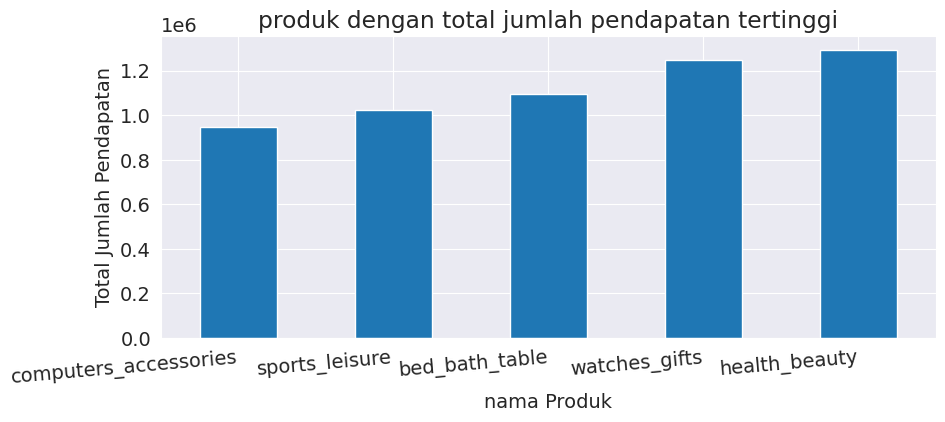

In [ ]:
#visualisasi
plt.figure(figsize=(10,4), dpi=100)
highest_selling_product.head(5).sort_values(ascending=True).plot(kind="bar")
plt.xticks(rotation=5, ha='right')
plt.xlabel('nama Produk')
plt.ylabel("Total Jumlah Pendapatan")
plt.title("produk dengan total jumlah pendapatan tertinggi")
plt.show()

Menampilkan Product dengan penjualan terendah

In [ ]:
#lowest_selling_product
lowest_selling_product = data7.groupby(["product_category_name_english"])["price"].sum().sort_values(ascending=True).iloc[:1]
lowest_selling_product

product_category_name_english
security_and_services    283.29
Name: price, dtype: float64

Menampilkan waktu awal dan akhir periode pada data

In [ ]:
#start_and_end_periode
print('Min : {}, Max : {}'.format(min(data7.order_approved_at), max(data7.order_approved_at)))

Min : 2016-10-04 09:43:32, Max : 2018-09-03 17:40:06


Menampilkan order terbanyak berdasarkan tahun

In [ ]:
#order_year
year_order = data7.groupby(['customer_unique_id'])['year'].max(data7['year'].count()).reset_index()
year_order = pd.DataFrame(data = year_order).rename(columns = {'year' : 'year_order'})
year_order['year_order'].value_counts()

2018    51619
2017    41486
2016      291
Name: year_order, dtype: int64

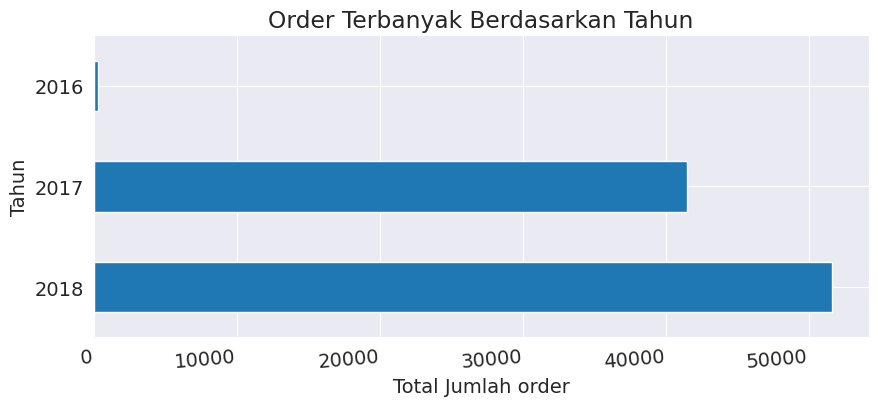

In [ ]:
#visualisasi
plt.figure(figsize=(10,4), dpi=100)
year_order['year_order'].value_counts().plot(kind="barh")
plt.xticks(rotation=5, ha='right')
plt.xlabel('Total Jumlah order')
plt.ylabel("Tahun")
plt.title("Order Terbanyak Berdasarkan Tahun")
plt.show()

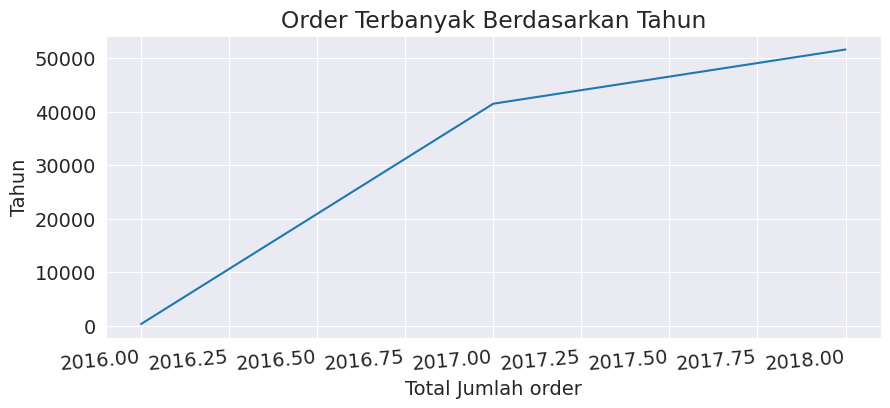

In [ ]:
#visualisasi
plt.figure(figsize=(10,4), dpi=100)
year_order['year_order'].value_counts().plot(kind="line")
plt.xticks(rotation=5, ha='right')
plt.xlabel('Total Jumlah order')
plt.ylabel("Tahun")
plt.title("Order Terbanyak Berdasarkan Tahun")
plt.show()

Menampilkan order terbanyak berdasarkan Bulan

In [ ]:
#mont_order
month_order = data7.groupby(['customer_unique_id'])['month'].max(data7['month'].count())
month_order = pd.DataFrame(data = month_order).reset_index()
month_name = {0 : 'Januari', 1 : 'Februari', 2 : 'Maret', 3 : 'April', 4 : 'Mei', 5 : 'Juni', 6 : 'Juli', 7 : 'Agustus', 8 : 'September', 9: 'Oktober', 10 : 'Nopember', 11 : 'Desember'}
data7['month_name'] = data7['month'].map(month_name)
month_order['month_order'] = month_order['month'].map(month_name)
month_order['month_order'].value_counts()

September    10363
Juni          9957
Agustus       9787
April         9197
Juli          8963
Mei           8798
Maret         7797
Februari      7341
Desember      7140
Nopember      4661
Oktober       4018
Name: month_order, dtype: int64

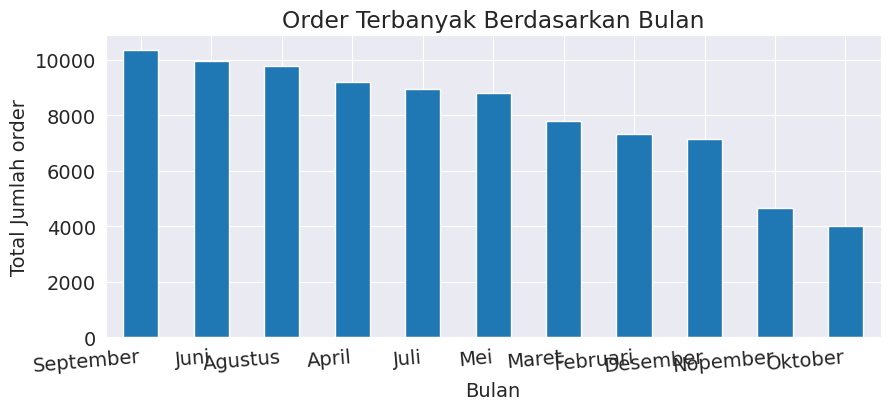

In [ ]:
#visualisasi
plt.figure(figsize=(10,4), dpi=100)
month_order['month_order'].value_counts().plot(kind="bar")
plt.xticks(rotation=5, ha='right')
plt.xlabel('Bulan')
plt.ylabel("Total Jumlah order")
plt.title("Order Terbanyak Berdasarkan Bulan")
plt.show()

Menampilkan order terbanyak berdasarkan hari

In [ ]:
day_order = data7.groupby(['customer_unique_id'])['day_of_week'].max(data7['day_of_week'].count())
day_order = pd.DataFrame(data = day_order).reset_index()

day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
data7['day_name'] = data7['day_of_week'].map(day_name)
day_order['day_order'] = day_order['day_of_week'].map(day_name)

day_order['day_order'].value_counts()

Monday       14930
Tuesday      14854
Wednesday    14537
Thursday     13886
Friday       13403
Sunday       11465
Saturday     10321
Name: day_order, dtype: int64

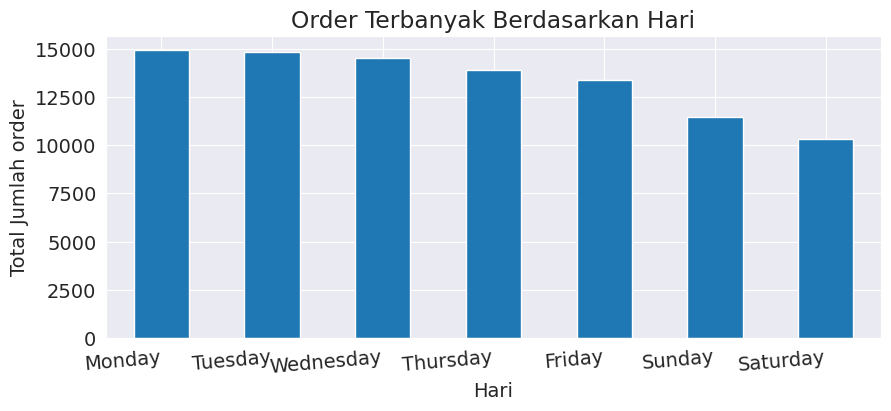

In [ ]:
#visualisasi
plt.figure(figsize=(10,4), dpi=100)
day_order['day_order'].value_counts().plot(kind="bar")
plt.xticks(rotation=5, ha='right')
plt.xlabel('Hari')
plt.ylabel("Total Jumlah order")
plt.title("Order Terbanyak Berdasarkan Hari")
plt.show()

https://colab.research.google.com/drive/14pCNHMoXYxTMvDVOaVgxpQnAQ-tKsqC6?usp=sharing

##Machine Learning

Membagi data menjadi 2 periode berdasarkan order_purchase_timestamp sebelum dan sesudah tgl 01/06/2018

In [ ]:
# periode ini akan digunakan untuk model
df1 = data7[data7['order_purchase_timestamp'] <='2018-06-01 00:00:00']
df1 = df1.sort_values(by='order_purchase_timestamp',ascending=True)
df1.shape

(93639, 45)

In [ ]:
# periode ini akan digunakan untuk input prediksi
df2 = data7[data7['order_purchase_timestamp'] > '2018-06-01 00:00:00']
df2 = df1.sort_values(by='order_purchase_timestamp',ascending=True)
df2.shape

(93639, 45)

###Feature Engineering







In [ ]:
df1.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,year,month,day_of_week
count,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93639.000000,93638.000000,93638.000000,93638.000000,93638.000000,93639.000000,93639.000000,93639.000000,93639.000000
mean,35499.676278,1.197471,120.208443,19.584826,24441.840622,1.102415,2.971273,171.822774,48.672604,776.919062,2.203217,2171.727333,30.728273,16.842094,23.339467,3.993048,2017.431124,5.804195,2.750862
std,29844.360406,0.701135,180.422780,14.939350,27540.678111,0.788663,2.805900,266.517608,10.075710,652.776628,1.719172,3854.424249,16.491157,13.738833,11.938957,1.408578,0.503385,3.521102,1.958231
min,1003.000000,1.000000,0.850000,0.000000,1001.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000,1.000000,2016.000000,1.000000,0.000000
25%,11702.000000,1.000000,39.900000,13.080000,6429.000000,1.000000,1.000000,60.600000,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,3.000000,2017.000000,3.000000,1.000000
50%,24933.000000,1.000000,74.900000,16.110000,13908.000000,1.000000,2.000000,107.780000,52.000000,591.000000,1.000000,704.000000,25.000000,13.000000,20.000000,5.000000,2017.000000,5.000000,3.000000
75%,59214.000000,1.000000,134.490000,20.750000,27930.000000,1.000000,4.000000,189.370000,57.000000,968.000000,3.000000,1850.000000,39.000000,20.000000,30.000000,5.000000,2018.000000,9.000000,4.000000
max,99980.000000,21.000000,6735.000000,409.680000,99730.000000,29.000000,24.000000,13664.080000,72.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,2018.000000,12.000000,6.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93639 entries, 18694 to 2051
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    93639 non-null  object        
 1   customer_unique_id             93639 non-null  object        
 2   customer_zip_code_prefix       93639 non-null  int64         
 3   customer_city                  93639 non-null  object        
 4   customer_state                 93639 non-null  object        
 5   order_id                       93639 non-null  object        
 6   order_status                   93639 non-null  object        
 7   order_purchase_timestamp       93639 non-null  datetime64[ns]
 8   order_approved_at              93625 non-null  datetime64[ns]
 9   order_delivered_carrier_date   92589 non-null  datetime64[ns]
 10  order_delivered_customer_date  91538 non-null  datetime64[ns]
 11  order_estima

In [ ]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [ ]:
df1[time_columns]=df1[time_columns].apply(pd.to_datetime)

In [ ]:
#membuat feauture recency 
df_recency= pd.DataFrame(df1.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())

In [ ]:
df_recency['recency']= df_recency['order_purchase_timestamp'].max() - df_recency['order_purchase_timestamp']
df_recency.recency=df_recency.recency.dt.days
df_recency

,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,21
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,24
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,447
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,231
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,198
...,...,...,...
75344,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,357
75345,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,172
75346,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,478
75347,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,29


In [ ]:
#membuat feauture frequency
df_frequency = pd.DataFrame(df1.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
df_frequency.rename(columns={"order_id":"frequency"}, inplace=True)
df_frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
75344,fffcf5a5ff07b0908bd4e2dbc735a684,1
75345,fffea47cd6d3cc0a88bd621562a9d061,1
75346,ffff371b4d645b6ecea244b27531430a,1
75347,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
#membuat feauture monetary
df_monetary = df1.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
df_monetary.columns = ['customer_unique_id', 'monetary']
df_monetary.head(10)

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,35.38
7,00053a61a98854899e70ed204dd4bafe,838.36
8,0005e1862207bf6ccc02e4228effd9a0,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,129.76


In [ ]:
df_RF = df_recency.merge(df_frequency, on='customer_unique_id')
df_RFM = df_RF.merge(df_monetary, on='customer_unique_id').drop(columns='order_purchase_timestamp')
df_RFM.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,21,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,24,1,27.19
2,0000f46a3911fa3c0805444483337064,447,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,231,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,198,1,196.89


In [ ]:
df_RFM.describe()

,recency,frequency,monetary
count,75349.000000,75349.000000,75349.000000
mean,195.128801,1.032887,213.530541
std,132.643076,0.203701,651.450300
min,0.000000,1.000000,10.070000
25%,85.000000,1.000000,63.990000
50%,177.000000,1.000000,112.430000
75%,292.000000,1.000000,203.710000
max,634.000000,10.000000,109312.640000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

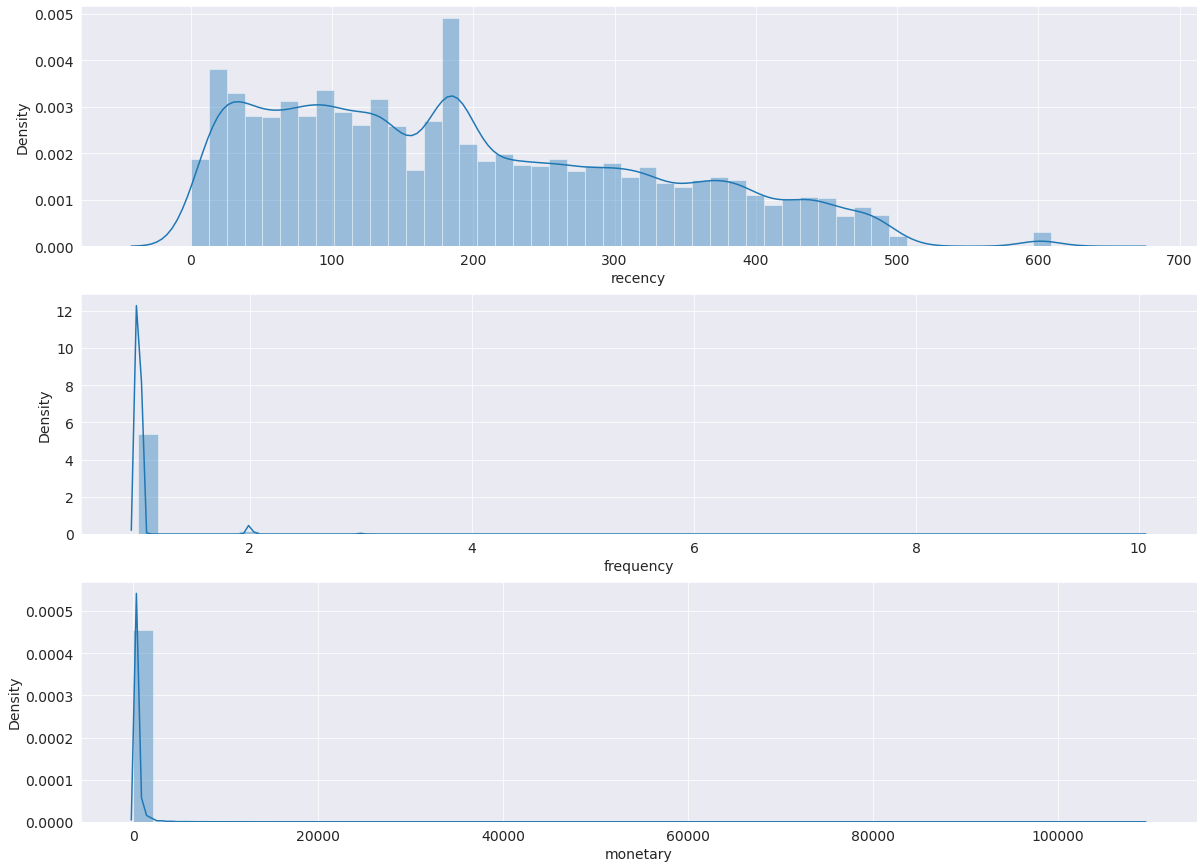

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1); sns.distplot(df_RFM['recency'])
plt.subplot(3, 1, 2); sns.distplot(df_RFM['frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_RFM['monetary'])
plt.show()

In [ ]:
# Menghitung recency score, frequency score dan monetary score
# refensi: https://www.omniconvert.com/blog/rfm-score/
df_RFM['recency_score'] = pd.qcut(df_RFM['recency'], 5, labels = [5, 4, 3, 2, 1])\
                      .astype(str)

# frequency dibagi 2  karena  customer kebanyakan melakukan order sebanyak 1x
df_RFM['frequency_score'] = df_RFM['frequency'].apply(lambda x : '1' if x == 1 else '2')

df_RFM['monetary_score'] = pd.qcut(df_RFM['monetary'], 5, labels = [1, 2, 3, 4, 5])\
                      .astype(str)

In [ ]:
df_RFM['recency_score'] = pd.to_numeric(df_RFM['recency_score'], errors='coerce')
df_RFM['frequency_score'] = pd.to_numeric(df_RFM['frequency_score'], errors='coerce')
df_RFM['monetary_score'] = pd.to_numeric(df_RFM['monetary_score'], errors='coerce')

In [ ]:
# referensi: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
df_RFM['RFM_Score'] = 0.15*df_RFM['recency_score']+0.28 * df_RFM['frequency_score']+0.57*df_RFM['monetary_score']
df_RFM['RFM_Score'] *= 0.05
df_RFM = df_RFM.round(2)
df_RFM.head(7)

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,21,1,141.90,5,1,4,0.17
1,0000b849f77a49e4a4ce2b2a4ca5be3f,24,1,27.19,5,1,1,0.08
2,0000f46a3911fa3c0805444483337064,447,1,86.22,1,1,2,0.08
3,0000f6ccb0745a6a4b88665a16c9f078,231,1,43.62,2,1,1,0.06
4,0004aac84e0df4da2b147fca70cf8255,198,1,196.89,3,1,4,0.15
5,0004bd2a26a76fe21f786e4fbd80607f,56,1,166.98,5,1,4,0.17
6,00050ab1314c0e55a6ca13cf7181fecf,41,1,35.38,5,1,1,0.08


In [ ]:
#membuat customer segmentation berdasarkan recency score, frequency score dan monetary score
# referensi: https://www.linkedin.com/pulse/rfm-primer-ecommerce-retailers-ian-pollard/
segment = []
for r,f,m in zip(df_RFM.recency_score, df_RFM.frequency_score, df_RFM.monetary_score):
    if 4 <= r <= 5 and 4 <= (f+m) <= 7:
        segment.append("loyal")
    elif 4 <= r <= 5 and 2 <= (f+m) <= 3:
        segment.append("Recent Customers")
    elif r == 3 and 6 <= (f+m) <= 7:
        segment.append("High Potential")
    elif r == 3 and 2 <= (f+m) <= 5:
        segment.append("Need Nurturing")
    elif r == 2 and 5 <= (f+m) <= 7:
        segment.append("Cant Lose")
    elif r == 2 and 2 <= (f+m) <= 4:
        segment.append("At Risk")
    elif r == 1 and (f+m) >= 2:
        segment.append("Lose")

In [ ]:
pd_segment = pd.DataFrame(segment, columns = ['segment'])
df_RFM['segment'] = pd_segment
df_RFM['segment'].value_counts()

loyal               18491
Lose                14957
Recent Customers    11936
Need Nurturing      11801
At Risk              9024
Cant Lose            6071
High Potential       3069
Name: segment, dtype: int64

In [ ]:
df_RFM['segment'].isna().sum()

0

In [ ]:
df_RFM['segment'].unique()

array(['loyal', 'Recent Customers', 'Lose', 'At Risk', 'Need Nurturing',
       'Cant Lose', 'High Potential'], dtype=object)

In [ ]:
df_RFM['segment'].nunique()

7

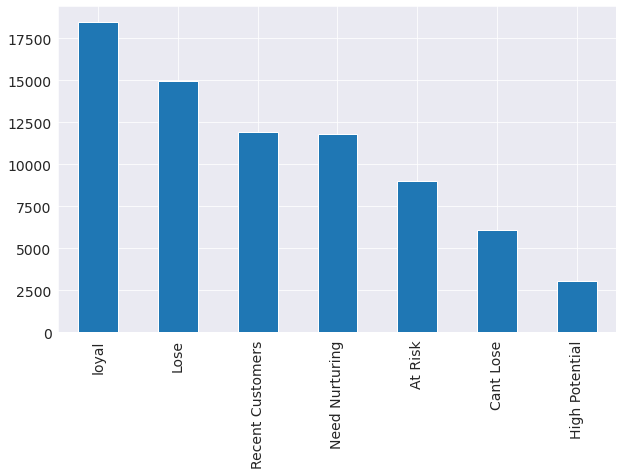

In [ ]:
df_RFM['segment'].value_counts().plot(kind='bar')

Membuat feature durasi antara first purchase dan last purchase

In [ ]:
#first purchase date
first_purchase = df1.groupby(['customer_unique_id'])['order_purchase_timestamp'].min()
first_purchase = pd.DataFrame(data = first_purchase).reset_index()
first_purchase = first_purchase.rename(columns = {'order_purchase_timestamp' : 'first_purchase_date'})

In [ ]:
#last purchase date
last_purchase = df1.groupby(['customer_unique_id'])['order_purchase_timestamp'].max()
last_purchase = pd.DataFrame(data = last_purchase).reset_index()
last_purchase = last_purchase.rename(columns = {'order_purchase_timestamp' : 'last_purchase_date'})

In [ ]:
df_new = pd.merge(first_purchase, last_purchase, on='customer_unique_id')
df_RFM = pd.merge(df_new, df_RFM, on='customer_unique_id')

In [ ]:
# feature durasi antara pembelian pertama dan pembelian terakhir
df_RFM["purchase_duration"] = (df_RFM['last_purchase_date'] - df_RFM['first_purchase_date']).dt.days


In [ ]:
# feature durasi antara pembelian pertama dan pembelian selanjutnya
df_RFM["frequency_duration"] = df_RFM['recency'] / df_RFM['frequency']

In [ ]:
# feature durasi waktu  untuk konfirmasi pesanan
df_RFM["confirmed_time"] = (df1['order_approved_at'] - df1['order_purchase_timestamp']).dt.days


In [ ]:
# feature  durasi waktu estimasi ketika barang tiba dan waktu aktualnya 
df_RFM["estimated_time"] = (df1['order_estimated_delivery_date'] - df1['order_delivered_customer_date']).dt.days


In [ ]:
#  feature durasi waktu yang dibutuhkan sampai pesanan tiba
df_RFM["delivery_time"] = (df1['order_delivered_customer_date'] - df1['order_delivered_carrier_date']).dt.days

In [ ]:
# Membuat data dari 3 bulan terakhir
data_last_months = df1[(df1['order_purchase_timestamp'] > '2018-03-01 00:00:00') & (df1['order_purchase_timestamp'] <= '2018-06-30 23:59:59')]
# data_last_months.sort_values(by='order_purchase_timestamp', ascending=True)

s = pd.merge(df_RFM, data_last_months, left_on='customer_unique_id',right_on='customer_unique_id',how='left')
df_RFM['purchased_3m'] = s.customer_unique_id.notnull().astype('category')
df_RFM['purchased_3m'].isna().sum()

0

In [ ]:
def kepuasan (x):
    if x >= 4:
        return "Satisfied"
    elif x == 3:
        return "Neutral"
    elif x <= 2: 
        return "Unsatisfied"

In [ ]:
df1['satisfaction'] = df1.review_score.apply(lambda x :kepuasan (x))

Membuat churn label berdasarkan recency masing-masing segmentasi customer

In [ ]:
df_RFM.segment.value_counts()

loyal               18491
Lose                14957
Recent Customers    11936
Need Nurturing      11801
At Risk              9024
Cant Lose            6071
High Potential       3069
Name: segment, dtype: int64

In [ ]:
df_RFM.groupby("segment")["frequency_duration"].mean()

segment
At Risk             264.249668
Cant Lose           253.859318
High Potential      164.977132
Lose                398.613392
Need Nurturing      172.929964
Recent Customers     70.464310
loyal                66.069524
Name: frequency_duration, dtype: float64

In [ ]:
df_RFM.head()

,customer_unique_id,first_purchase_date,last_purchase_date,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,segment,purchase_duration,frequency_duration,confirmed_time,estimated_time,delivery_time,purchased_3m
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,21,1,141.90,5,1,4,0.17,loyal,0,21.0,0.0,10.0,1.0,True
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,24,1,27.19,5,1,1,0.08,Recent Customers,0,24.0,0.0,20.0,5.0,True
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,447,1,86.22,1,1,2,0.08,Lose,0,447.0,0.0,20.0,5.0,True
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,231,1,43.62,2,1,1,0.06,At Risk,0,231.0,1.0,16.0,6.0,True
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,198,1,196.89,3,1,4,0.15,Need Nurturing,0,198.0,1.0,21.0,9.0,True


In [ ]:
#membuat churn label
# referensi: https://www.linkedin.com/pulse/customer-churn-analysis-oversimplified-wrong-ian-pollard/
churn = []
for segment, recency in zip(df_RFM.segment, df_RFM.recency):
    if segment == "Lose":
        churn.append(1)
    elif segment == "At Risk":
        if recency > 260:
            churn.append(1)
        else:
            churn.append(0)
    elif segment == "Cant Lose":
        if recency > 212:
            churn.append(1)
        else:
            churn.append(0)
    elif segment == "High Potential":
        if recency > 122:
            churn.append(1)
        else:
            churn.append(0)
    elif segment == "Need Nurturing":
        if recency > 170:
            churn.append(1)
        else:
            churn.append(0)
    elif segment == "Recent Customers":
        if recency > 69:
            churn.append(1)
        else:
            churn.append(0)
    elif segment == "loyal":
        if recency > 58:
            churn.append(1)
        else:
            churn.append(0)

In [ ]:
pd_churn = pd.DataFrame(churn, columns = ['churn'])
df_RFM['churn'] = pd_churn
df_RFM['churn'].value_counts()

1    52345
0    23004
Name: churn, dtype: int64

In [ ]:
df_RFM['churn'].astype('category')

0        0
1        0
2        1
3        0
4        1
        ..
75344    1
75345    1
75346    1
75347    0
75348    1
Name: churn, Length: 75349, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
df1 = df1.drop_duplicates(subset = ["customer_unique_id"])

In [ ]:
df = pd.merge(df1, df_RFM, on='customer_unique_id', how="inner")

In [ ]:
df = df[["customer_unique_id", "customer_state", "freight_value", "payment_type", "satisfaction", "segment",
         "delivery_time", "confirmed_time", "estimated_time", "recency", "frequency", "monetary", "purchase_duration", 
         "frequency_duration", "purchased_3m", "recency_score", "frequency_score", "monetary_score", "churn"]]

In [ ]:
df.corr()

,freight_value,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,recency_score,frequency_score,monetary_score,churn
freight_value,1.000000,-0.000361,-0.007281,0.001214,-0.009351,-0.010778,0.176173,-0.005046,-0.008083,0.009159,-0.010795,0.353050,0.051737
delivery_time,-0.000361,1.000000,0.006360,-0.642342,0.001806,0.004159,0.008094,0.002308,0.000786,-0.000861,0.006209,0.006731,0.002820
confirmed_time,-0.007281,0.006360,1.000000,-0.043994,-0.005136,-0.002246,-0.004727,0.005144,-0.004606,0.005941,0.001058,-0.008432,-0.006458
estimated_time,0.001214,-0.642342,-0.043994,1.000000,-0.005343,-0.004102,-0.003772,-0.006980,-0.004457,0.005317,-0.006134,-0.002237,-0.005597
recency,-0.009351,0.001806,-0.005136,-0.005343,1.000000,-0.022989,-0.004761,-0.057181,0.989556,-0.956775,-0.021883,-0.012813,0.494649
frequency,-0.010778,0.004159,-0.002246,-0.004102,-0.022989,1.000000,0.077223,0.582400,-0.133497,0.021714,0.922984,0.152835,0.028511
monetary,0.176173,0.008094,-0.004727,-0.003772,-0.004761,0.077223,1.000000,0.039256,-0.013078,0.004311,0.073924,0.293738,0.042741
purchase_duration,-0.005046,0.002308,0.005144,-0.006980,-0.057181,0.582400,0.039256,1.000000,-0.102883,0.055686,0.577047,0.096204,-0.013680
frequency_duration,-0.008083,0.000786,-0.004606,-0.004457,0.989556,-0.133497,-0.013078,-0.102883,1.000000,-0.946087,-0.139270,-0.031307,0.483750
recency_score,0.009159,-0.000861,0.005941,0.005317,-0.956775,0.021714,0.004311,0.055686,-0.946087,1.000000,0.019264,0.011922,-0.467028


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

customer_unique_id        0
customer_state            0
freight_value             0
payment_type              0
satisfaction              0
segment                   0
delivery_time         14674
confirmed_time        13283
estimated_time        14673
recency                   0
frequency                 0
monetary                  0
purchase_duration         0
frequency_duration        0
purchased_3m              0
recency_score             0
frequency_score           0
monetary_score            0
churn                     0
dtype: int64

Sebelum handling missing value

In [ ]:
px.histogram(df, x='customer_state', title='State vs. Churn', color='churn')

In [ ]:
px.histogram(df, x='recency', title='Recency vs. Churn', color='churn')

In [ ]:
px.histogram(df, x='monetary_score', title='Monetary vs. Churn', color='churn')

In [ ]:
px.histogram(df, x='frequency_score', title='Frequency vs. Churn', color='churn')

In [ ]:
px.scatter(df.sample(20000), 
           title='frequency vs recency',
           x='frequency', 
           y='recency', 
           color='churn')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (45209, 19)
val_df.shape : (15070, 19)
test_df.shape : (15070, 19)


In [ ]:
train_df.head()

,customer_unique_id,customer_state,freight_value,payment_type,satisfaction,segment,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,purchased_3m,recency_score,frequency_score,monetary_score,churn
11477,62c6261a49af301b1b6238960090ff4d,RJ,15.10,credit_card,Satisfied,Lose,13.0,1.0,6.0,359,1,64.00,0,359.0,True,1,1,2,1
61049,81cfe11d1b667c768e77b6a9db5fe9b3,RJ,11.77,credit_card,Satisfied,loyal,9.0,0.0,17.0,66,1,141.67,0,66.0,True,5,1,4,1
4967,7a15821a6aa742614b36c347e2c6e54f,SP,13.42,boleto,Satisfied,Lose,6.0,1.0,10.0,429,1,303.42,0,429.0,True,1,1,5,1
3145,72450dc4ac669cfa92d31b4ea583b492,RJ,14.61,boleto,Satisfied,Lose,16.0,0.0,16.0,450,1,77.51,0,450.0,True,1,1,2,1
65211,086230886f279f9160a8d29bd66dd431,SP,18.48,credit_card,Satisfied,loyal,NaN,NaN,NaN,46,1,2359.68,0,46.0,True,5,1,5,0


In [ ]:
val_df.head()

,customer_unique_id,customer_state,freight_value,payment_type,satisfaction,segment,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,purchased_3m,recency_score,frequency_score,monetary_score,churn
63483,5c7bf79c18e9b98a2f1fa6598d23a635,DF,14.81,credit_card,Satisfied,loyal,8.0,0.0,15.0,55,1,658.84,0,55.0,True,5,1,5,0
69921,c4128ac54f10eb8d7cd099250d5d62d3,SP,7.43,credit_card,Unsatisfied,loyal,13.0,0.0,20.0,26,1,501.51,0,26.0,True,5,1,5,0
284,7965955995b477fd7c304f4caf2c6d26,SP,10.96,credit_card,Unsatisfied,Lose,19.0,0.0,0.0,598,1,40.86,0,598.0,True,1,1,1,1
59583,3a93b058ab7eaad243c67fc2f88ec591,SP,13.74,credit_card,Satisfied,loyal,1.0,0.0,5.0,73,1,101.64,0,73.0,True,4,1,3,1
12998,712c585efd882e98a6380f37d040ad4c,MG,14.45,credit_card,Satisfied,Lose,23.0,0.0,0.0,345,1,117.35,0,345.0,True,1,1,3,1


In [ ]:
test_df.head()

,customer_unique_id,customer_state,freight_value,payment_type,satisfaction,segment,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,purchased_3m,recency_score,frequency_score,monetary_score,churn
6391,324ba75d05474e0c1cbef8c0ad257a2b,SP,10.96,credit_card,Unsatisfied,Lose,2.0,1.0,18.0,408,1,29.95,0,408.0,True,1,1,1,1
60039,740b0905a1e5586e67956320eb679fcc,PR,16.32,credit_card,Satisfied,Recent Customers,9.0,0.0,9.0,71,1,51.22,0,71.0,True,4,1,1,1
19101,13dbc23e2f9dd054e0ebd8d4f4f47fb4,SP,13.59,credit_card,Satisfied,Cant Lose,NaN,NaN,NaN,293,1,312.59,0,293.0,True,2,1,5,1
59724,df6a5b41d79d117478cfc8b8176605bc,PR,18.23,credit_card,Satisfied,Recent Customers,7.0,0.0,5.0,72,1,33.23,0,72.0,True,4,1,1,1
34561,32ce48bf9f5586f16e15a2864a29f020,MG,15.24,credit_card,Satisfied,Need Nurturing,13.0,0.0,8.0,188,1,85.14,0,188.0,True,3,1,2,1


In [ ]:
input_cols = list(df.columns)[1:-1]
target_col = 'churn'

In [ ]:
print(input_cols)

['customer_state', 'freight_value', 'payment_type', 'satisfaction', 'segment', 'delivery_time', 'confirmed_time', 'estimated_time', 'recency', 'frequency', 'monetary', 'purchase_duration', 'frequency_duration', 'purchased_3m', 'recency_score', 'frequency_score', 'monetary_score']


In [ ]:
target_col

'churn'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

,customer_state,freight_value,payment_type,satisfaction,segment,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,purchased_3m,recency_score,frequency_score,monetary_score
11477,RJ,15.10,credit_card,Satisfied,Lose,13.0,1.0,6.0,359,1,64.00,0,359.0,True,1,1,2
61049,RJ,11.77,credit_card,Satisfied,loyal,9.0,0.0,17.0,66,1,141.67,0,66.0,True,5,1,4
4967,SP,13.42,boleto,Satisfied,Lose,6.0,1.0,10.0,429,1,303.42,0,429.0,True,1,1,5
3145,RJ,14.61,boleto,Satisfied,Lose,16.0,0.0,16.0,450,1,77.51,0,450.0,True,1,1,2
65211,SP,18.48,credit_card,Satisfied,loyal,NaN,NaN,NaN,46,1,2359.68,0,46.0,True,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50901,SP,13.03,credit_card,Satisfied,loyal,6.0,0.0,34.0,112,1,232.03,0,112.0,True,4,1,4
10988,RJ,14.10,credit_card,Satisfied,Lose,NaN,NaN,NaN,364,1,31.09,0,364.0,True,1,1,1
18929,SP,11.73,boleto,Neutral,At Risk,4.0,0.0,21.0,295,1,70.72,0,295.0,True,2,1,2
17797,SP,12.48,voucher,Neutral,At Risk,7.0,2.0,5.0,303,1,62.47,0,303.0,True,2,1,2


In [ ]:
train_targets

11477    1
61049    1
4967     1
3145     1
65211    0
        ..
50901    1
10988    1
18929    1
17797    1
32933    1
Name: churn, Length: 45209, dtype: int64

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['freight_value',
 'delivery_time',
 'confirmed_time',
 'estimated_time',
 'recency',
 'frequency',
 'monetary',
 'purchase_duration',
 'frequency_duration',
 'recency_score',
 'frequency_score',
 'monetary_score']

In [ ]:
train_inputs[numeric_cols].describe()

,freight_value,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,recency_score,frequency_score,monetary_score
count,45209.000000,36291.000000,37124.000000,36291.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,19.831314,9.466865,0.281381,10.882891,195.116127,1.033334,214.076929,2.044438,192.315378,3.008582,1.029972,3.000509
std,15.347016,8.891816,0.872262,10.175271,132.873050,0.206767,717.369136,20.227393,132.727638,1.418295,0.170512,1.415238
min,0.000000,-17.000000,0.000000,-167.000000,0.000000,1.000000,11.630000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,13.370000,4.000000,0.000000,7.000000,85.000000,1.000000,63.790000,0.000000,82.000000,2.000000,1.000000,2.000000
50%,16.160000,7.000000,0.000000,12.000000,177.000000,1.000000,112.600000,0.000000,174.000000,3.000000,1.000000,3.000000
75%,20.860000,12.000000,0.000000,16.000000,292.000000,1.000000,204.280000,0.000000,289.000000,4.000000,1.000000,4.000000
max,409.680000,194.000000,60.000000,134.000000,634.000000,10.000000,109312.640000,580.000000,634.000000,5.000000,2.000000,5.000000


In [ ]:
train_inputs[categorical_cols].nunique()

customer_state    27
payment_type       4
satisfaction       3
segment            7
dtype: int64

###Handling missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
df[numeric_cols].isna().sum()

freight_value             0
delivery_time         14674
confirmed_time        13283
estimated_time        14673
recency                   0
frequency                 0
monetary                  0
purchase_duration         0
frequency_duration        0
recency_score             0
frequency_score           0
monetary_score            0
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()

freight_value            0
delivery_time         8918
confirmed_time        8085
estimated_time        8918
recency                  0
frequency                0
monetary                 0
purchase_duration        0
frequency_duration       0
recency_score            0
frequency_score          0
monetary_score           0
dtype: int64

In [ ]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [ ]:
list(imputer.statistics_)

[19.75147712643831,
 9.508693860733416,
 0.2795894692746431,
 10.796113784692466,
 195.12880064765292,
 1.03288696598495,
 213.53054094944858,
 2.097599171853641,
 192.40659189713395,
 3.0081885625555747,
 1.0296885161050577,
 2.9997080253221675]

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

freight_value         0
delivery_time         0
confirmed_time        0
estimated_time        0
recency               0
frequency             0
monetary              0
purchase_duration     0
frequency_duration    0
recency_score         0
frequency_score       0
monetary_score        0
dtype: int64

In [ ]:
train_inputs[categorical_cols].isna().sum()

customer_state    0
payment_type      0
satisfaction      0
segment           0
dtype: int64

###Features Scalling

In [ ]:
df[numeric_cols].describe()

,freight_value,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,recency_score,frequency_score,monetary_score
count,75349.000000,60675.000000,62066.000000,60676.000000,75349.000000,75349.000000,75349.000000,75349.000000,75349.000000,75349.000000,75349.000000,75349.000000
mean,19.751477,9.508694,0.279589,10.796114,195.128801,1.032887,213.530541,2.097599,192.406592,3.008189,1.029689,2.999708
std,15.090866,9.068473,0.869558,10.326060,132.643076,0.203701,651.450300,20.781426,132.587283,1.415367,0.169728,1.414336
min,0.000000,-17.000000,0.000000,-189.000000,0.000000,1.000000,10.070000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,13.300000,4.000000,0.000000,7.000000,85.000000,1.000000,63.990000,0.000000,83.000000,2.000000,1.000000,2.000000
50%,16.150000,7.000000,0.000000,12.000000,177.000000,1.000000,112.430000,0.000000,174.000000,3.000000,1.000000,3.000000
75%,20.800000,12.000000,0.000000,16.000000,292.000000,1.000000,203.710000,0.000000,288.000000,4.000000,1.000000,4.000000
max,409.680000,205.000000,60.000000,146.000000,634.000000,10.000000,109312.640000,580.000000,634.000000,5.000000,2.000000,5.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0, -17.0, 0.0, -189.0, 0.0, 1.0, 10.07, 0.0, 0.0, 1.0, 1.0, 1.0]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[409.68,
 205.0,
 60.0,
 146.0,
 634.0,
 10.0,
 109312.64,
 580.0,
 634.0,
 5.0,
 2.0,
 5.0]

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,freight_value,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,recency_score,frequency_score,monetary_score
count,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,0.048407,0.119257,0.004684,0.596614,0.307754,0.003704,0.001866,0.003525,0.303337,0.502146,0.029972,0.500127
std,0.037461,0.035886,0.013174,0.027214,0.209579,0.022974,0.006563,0.034875,0.209350,0.354574,0.170512,0.353809
min,0.000000,0.000000,0.000000,0.065672,0.000000,0.000000,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032635,0.099099,0.000000,0.588060,0.134069,0.000000,0.000491,0.000000,0.129338,0.250000,0.000000,0.250000
50%,0.039445,0.117117,0.000000,0.596406,0.279180,0.000000,0.000938,0.000000,0.274448,0.500000,0.000000,0.500000
75%,0.050918,0.126126,0.004660,0.605970,0.460568,0.000000,0.001777,0.000000,0.455836,0.750000,0.000000,0.750000
max,1.000000,0.950450,1.000000,0.964179,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Encoding Categorical Data

In [ ]:
df[categorical_cols].nunique()

customer_state    27
payment_type       4
satisfaction       3
segment            7
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoder.categories_

[array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object),
 array(['boleto', 'credit_card', 'debit_card', 'voucher'], dtype=object),
 array(['Neutral', 'Satisfied', 'Unsatisfied'], dtype=object),
 array(['At Risk', 'Cant Lose', 'High Potential', 'Lose', 'Need Nurturing',
        'Recent Customers', 'loyal'], dtype=object)]

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['customer_state_AC', 'customer_state_AL', 'customer_state_AM', 'customer_state_AP', 'customer_state_BA', 'customer_state_CE', 'customer_state_DF', 'customer_state_ES', 'customer_state_GO', 'customer_state_MA', 'customer_state_MG', 'customer_state_MS', 'customer_state_MT', 'customer_state_PA', 'customer_state_PB', 'customer_state_PE', 'customer_state_PI', 'customer_state_PR', 'customer_state_RJ', 'customer_state_RN', 'customer_state_RO', 'customer_state_RR', 'customer_state_RS', 'customer_state_SC', 'customer_state_SE', 'customer_state_SP', 'customer_state_TO', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher', 'satisfaction_Neutral', 'satisfaction_Satisfied', 'satisfaction_Unsatisfied', 'segment_At Risk', 'segment_Cant Lose', 'segment_High Potential', 'segment_Lose', 'segment_Need Nurturing', 'segment_Recent Customers', 'segment_loyal']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
val_inputs

,customer_state,freight_value,payment_type,satisfaction,segment,delivery_time,confirmed_time,estimated_time,recency,frequency,monetary,purchase_duration,frequency_duration,purchased_3m,recency_score,frequency_score,monetary_score,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,satisfaction_Neutral,satisfaction_Satisfied,satisfaction_Unsatisfied,segment_At Risk,segment_Cant Lose,segment_High Potential,segment_Lose,segment_Need Nurturing,segment_Recent Customers,segment_loyal
63483,DF,0.036150,credit_card,Satisfied,loyal,0.112613,0.000000,0.608955,0.086751,0.0,0.005936,0.0,0.086751,True,1.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69921,SP,0.018136,credit_card,Unsatisfied,loyal,0.135135,0.000000,0.623881,0.041009,0.0,0.004496,0.0,0.041009,True,1.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284,SP,0.026753,credit_card,Unsatisfied,Lose,0.162162,0.000000,0.564179,0.943218,0.0,0.000282,0.0,0.943218,True,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59583,SP,0.033538,credit_card,Satisfied,loyal,0.081081,0.000000,0.579104,0.115142,0.0,0.000838,0.0,0.115142,True,0.75,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12998,MG,0.035271,credit_card,Satisfied,Lose,0.180180,0.000000,0.564179,0.544164,0.0,0.000981,0.0,0.544164,True,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67572,DF,0.056898,credit_card,Satisfied,loyal,0.171171,0.016667,0.561194,0.056782,0.0,0.001128,0.0,0.056782,True,1.00,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48822,RS,0.036882,credit_card,Satisfied,Recent Customers,0.119409,0.004660,0.596406,0.190852,0.0,0.000457,0.0,0.190852,True,0.75,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54030,SP,0.052748,credit_card,Neutral,loyal,0.518018,0.000000,0.328358,0.152997,0.0,0.006554,0.0,0.152997,True,0.75,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11131,SP,0.034734,credit_card,Satisfied,Lose,0.139640,0.000000,0.570149,0.572555,0.0,0.000669,0.0,0.572555,True,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (45209, 58)
train_targets: (45209,)
val_inputs: (15070, 58)
val_targets: (15070,)
test_inputs: (15070, 58)
test_targets: (15070,)


###Logictic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
print("weight untuk setiap input:")
print(model.coef_.tolist())

weight untuk setiap input:
[[0.6570771739618692, -0.3729982996942338, -0.015217339908475083, -0.938022788765506, 38.28422384608528, 0.7644432669750322, -0.2109274938115228, -1.6246705006939361, 29.15764220511557, -12.56311707065146, 2.9949008829621855, -0.15303213854161823, -0.1377407016061705, -0.05401940519877256, -0.36689279248329504, -0.6656103191462657, -0.151531819118755, -0.24044564005494165, -0.0852025125394763, -0.18473965112602195, -0.21377234008264712, -0.1785826315791076, -0.02689566802556034, -0.4118367168208977, -0.3228632602743929, -0.09575767932926021, -0.11287732732480515, -0.21530521449715842, 0.008210044538850797, -0.17234705799376665, -0.08985444904767663, 0.12104191420730934, -0.6342868011364966, 0.5364298862651276, 0.017120118467697575, -0.21425992145233513, -0.2631213397734872, -0.10548357280348017, 0.098361585538589, -1.1051022952386356, -1.0740231879750792, -0.8356296126009675, -1.147508176592168, -1.4025139709542793, -1.4871559265168726, -1.2725933749375986, -

In [ ]:
print(model.intercept_)

[-4.16226327]


membuat prediksi

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[4.21884749e-14, 1.00000000e+00],
       [4.51782685e-01, 5.48217315e-01],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [2.37870860e-02, 9.76212914e-01],
       [1.03168575e-02, 9.89683142e-01],
       [6.42670290e-02, 9.35732971e-01]])

In [ ]:
model.classes_

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9790307239708907

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.96073505, 0.03926495],
       [0.01282051, 0.98717949]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 97.90%


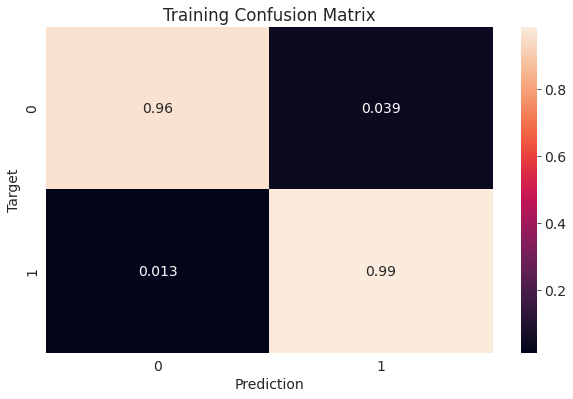

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 98.00%


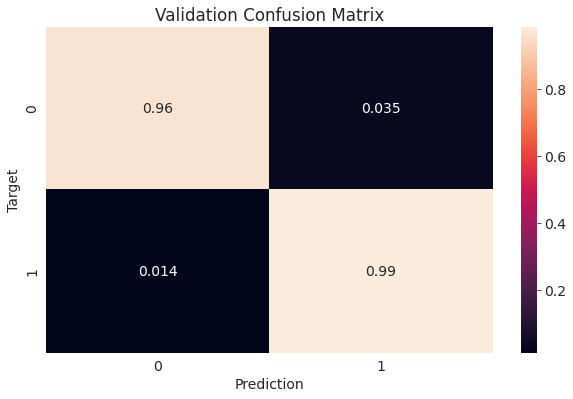

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 97.90%


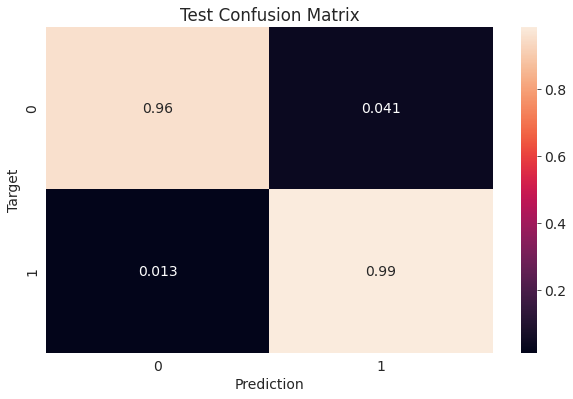

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

###Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42) 

In [ ]:
tree_model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Membuat prediksi

In [ ]:
def predict_and_plot_tree(inputs, targets, name=''):
    preds = tree_model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 100.00%


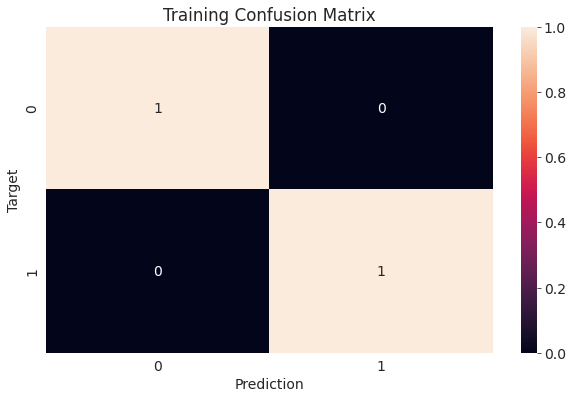

In [ ]:
train_preds = predict_and_plot_tree(X_train, train_targets, 'Training')

Accuracy: 100.00%


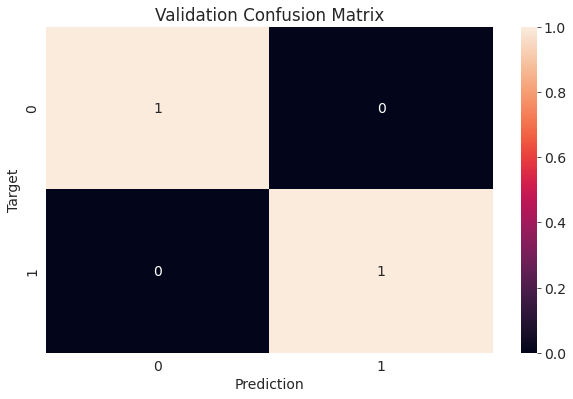

In [ ]:
val_preds = predict_and_plot_tree(X_val, val_targets, 'Validation')

Accuracy: 97.90%


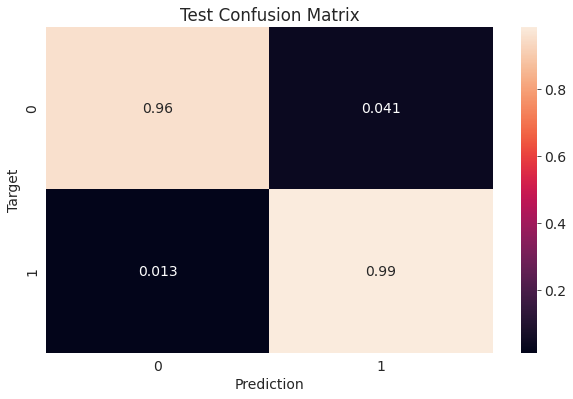

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

###Insight and Business Decision

Dari data ini, saya menggolongkan perilaku customer dari total jumlah populasi customer berdasarkan recency score, frequency score dan monetary score sebagai berikut : 

*  customer loyal             = 18491
*  customer Lose              = 14957
*  customer Recent Customers  = 11936
*  customer Need Nurturing    = 11801
*  customer At Risk           =  9024
*  customer  Cant Lose        =  6071
*  customer High Potential    =  3069


Hal yang dapat dilakukan untuk meminimalkan churn diantaranya : 

1. Memberikan penawaran special untuk product best seller kepada customer, adapun yang termasuk product best seller pada data ini 5 diantaranya :  
             1. health_beauty            
             2. watches_gifts            
             3. bed_bath_table           
             4. sports_leisure           
             5. computers_accessories     

2. Dalam Metode pembayaran, Metode pembayaran yang paling banyak digunakan adalah metode pembayaran dengan kartu kredit. Maka dari itu hal yang harus diperhatikan dalam hal ini yaitu mempermudah customer saat menggunakan metode pembayaran kartu kredit.

3. Dalam Penjualan berdasarkan bulan, penjualan terbanyak terjadi pada bulan 'september' dengan demikian kita dapat membuat sebuah event / penawaran special pada bulan ini. Selain itu hal yang harus diperhatikan pada pada bulan - bulan lainnya yaitu diperlukan adanya evaluasi dan penawaran special / extra pada bulan tersebut sehingga dapat meningkatkan minat customer untuk melakukan order di bulan tersebut.

4. Dalam penjualan berdasarkan hari, penjulan terbanyak terjadi pada hari senin, dengan demikian kita dapat memberikan penawaran spesial pada hari tersebut. Selain itu kita juga harus mengevaluasi dan memberikan penawaran pada hari -  hari lainnya sehingga dapat meningkat kan penjualan pada hari tersebut.

5. Berdasarkan kota, penjualan terbanyak terjadi di kota san paulo. Dengan demikian kita harus mempertahankan dan meningkatkan kualitas penjualan pada kota tersebut. Selain itu kita juga harus mengadakan evaluasi kendala atau permasalahan customer yang terjadi pada kota - kota lainnya sehingga dapat meningkatkan penjualan dikota tersebut. 

https://colab.research.google.com/drive/1Acy1lvBwc7jl7S-Xr_i3pGDju0Yc_eWx?usp=sharing